# AI-Powered Insights & Analysis on Youth Tobacco Survey Data  
This project analyzes the Global Youth Tobacco Survey (GYTS-4) dataset using data science and AI techniques.  
Goals:  
- Visualize trends in youth tobacco usage.  
- Generate AI-driven textual insights using NLP for public health understanding.


## Objectives  
- Analyze youth tobacco usage across different states in India.  
- Visualize trends to identify high-risk states.  
- Generate AI-driven textual insights for quick understanding.


## Dataset Information  
- **Source:** Global Youth Tobacco Survey (GYTS-4)  
- **Columns Used:**  
  - `State/UT`: State or Union Territory in India  
  - `Ever tobacco users (%)`: Percentage of youth who have tried tobacco  
  - `Current tobacco users (%)`: Percentage of youth currently using tobacco


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Govt_Tobacco_Data.csv to Govt_Tobacco_Data.csv


In [3]:
import pandas as pd

# Load and clean dataset
file_path = "Govt_Tobacco_Data.csv"
data = pd.read_csv(file_path)
cleaned_data = data.dropna(subset=['State/UT', 'Ever tobacco users (%)', 'Current tobacco users (%)'])
print(cleaned_data.head())


                      State/UT   Area  Ever tobacco users (%)  \
0                        India  Total                    18.1   
1                        India  Urban                    13.5   
2                        India  Rural                    19.5   
3  Andaman and Nicobar Islands  Total                    21.5   
4  Andaman and Nicobar Islands  Urban                    13.3   

   Current tobacco users (%)  Ever tobacco smokers (%)  \
0                        8.5                      11.0   
1                        5.5                       8.1   
2                        9.4                      11.8   
3                        4.4                       8.8   
4                        3.4                       6.5   

   Current tobacco smokers (%)  Ever cigarette users (%)  \
0                          7.3                       4.6   
1                          4.5                       4.1   
2                          8.1                       4.7   
3                   

## Data Visualization  
### Top 10 States with Highest Current Tobacco Users (%)


<ipython-input-4-33c94f9d117a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_state_usage.head(10), x='Current tobacco users (%)', y='State/UT', palette='viridis')


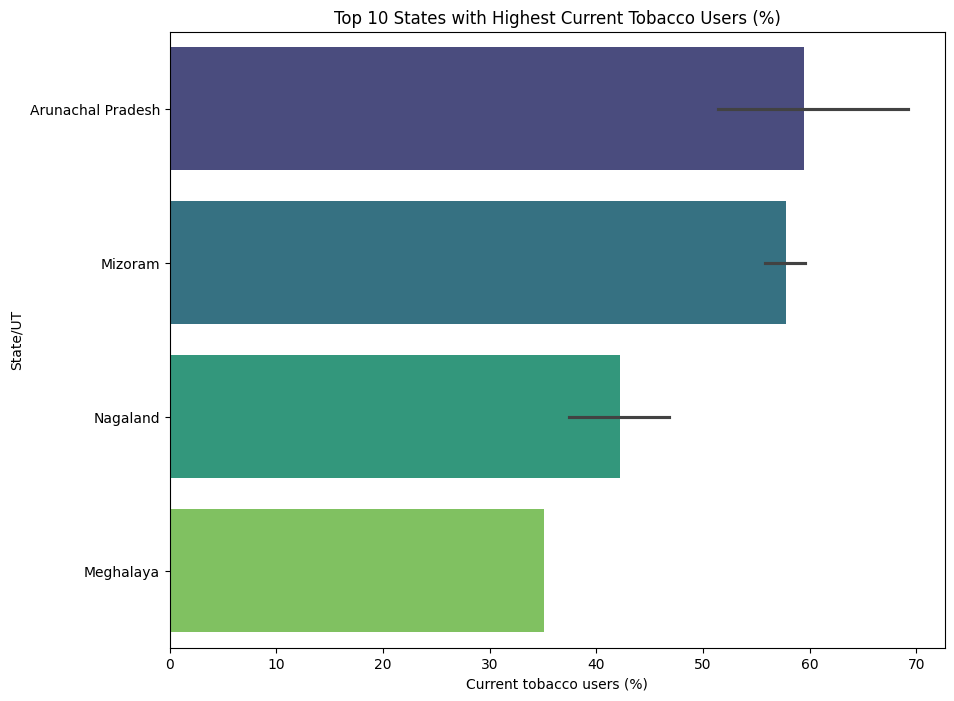

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization code
sorted_state_usage = cleaned_data[['State/UT', 'Current tobacco users (%)']].sort_values(by='Current tobacco users (%)', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(data=sorted_state_usage.head(10), x='Current tobacco users (%)', y='State/UT', palette='viridis')
plt.title("Top 10 States with Highest Current Tobacco Users (%)")
plt.show()


## NLP-Based Insight Generation  
Using the BART model to summarize key statistics for selected states.


In [5]:
from transformers import pipeline

# Create text summaries
cleaned_data['Summary_Text'] = cleaned_data.apply(
    lambda row: f"In {row['State/UT']}, {row['Ever tobacco users (%)']}% have ever used tobacco and {row['Current tobacco users (%)']}% are current users.",
    axis=1
)

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
sample_texts = cleaned_data['Summary_Text'].head(3).tolist()
for text in sample_texts:
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    print(f"Original: {text}\nSummary: {summary[0]['summary_text']}\n")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 50, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original: In India, 18.1% have ever used tobacco and 8.5% are current users.
Summary: 18.1% of Indians have ever used tobacco and 8.5% are current users. In India, 18% of adults have used tobacco at some point in their lives.



Your max_length is set to 50, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original: In India, 13.5% have ever used tobacco and 5.5% are current users.
Summary: In India, 13.5% have ever used tobacco and 5.5 per cent are current users. In the U.S., 13% of adults have used tobacco or have used it in the past.

Original: In India, 19.5% have ever used tobacco and 9.4% are current users.
Summary: In India, 19.5% have ever used tobacco and 9.4% are current users. In India, 18% of the population has used tobacco at least once.

